In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_with_packet_flow_no_load import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



normal_df = pd.read_csv('data/normal1.csv')
processed_normal = process_df(normal_df)

attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)

In [14]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=10)
svd_normal = svd.fit_transform(processed_normal.values)

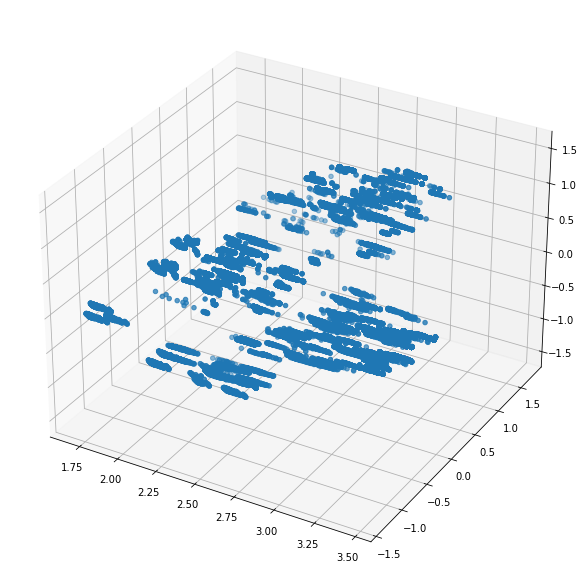

In [21]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = plt.axes(projection='3d')
ax.scatter3D([x[0] for x in svd_normal],[y[1] for y in svd_normal],[z[2] for z in svd_normal],'jet')

In [26]:
from sklearn.cluster import DBSCAN
from numpy import unique, where

model = DBSCAN(eps=0.30, min_samples=9)

yhat = model.fit_predict(svd_normal)

clusters = unique(yhat)


In [13]:
# x = [x[0] for x in svd_normal]
# y = [y[1] for y in svd_normal]

# normal_df['x'] = x
# normal_df['y'] = y

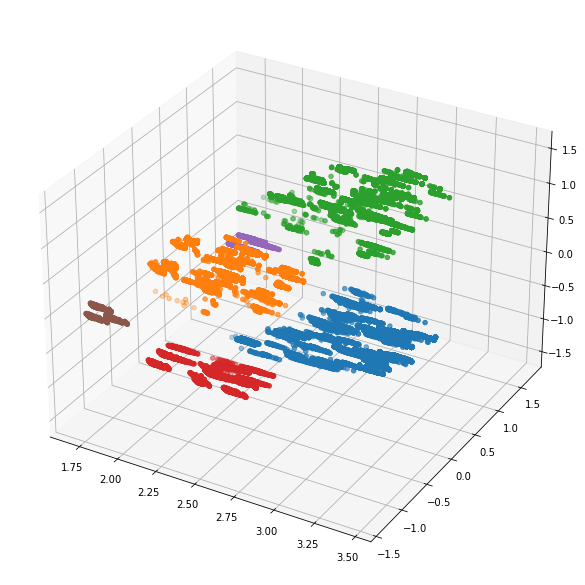

In [27]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = plt.axes(projection='3d')

for cluster in clusters:
    row_ix = where(yhat == cluster)
    ax.scatter3D(svd_normal[row_ix, 0], svd_normal[row_ix, 1], svd_normal[row_ix, 2])

In [30]:
normal_df['predicted'] = list(yhat)

In [31]:
normal_df['predicted'].value_counts()

0    81339
2    27771
1    19154
3     9860
4     1207
5     1207
Name: predicted, dtype: int64